In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# import data
train = pd.read_csv("data/galaxies_train.csv")
test = pd.read_csv("data/galaxies_test.csv")


# find 
X, y =  train.iloc[:,1:],  train["redshift"]
X_test, y_test =  test.iloc[:,1:],  test["redshift"]

train.head()


,redshift,norm(psf_u),norm(psf_g),norm(psf_r),norm(psf_i),norm(psf_z),norm(model_u),norm(model_g),norm(model_r),norm(model_i),norm(model_z)
0,0.398406,0.376969,0.490428,0.518303,0.486947,0.558504,0.389864,0.404095,0.433127,0.372722,0.466342
1,0.978559,0.453930,0.547790,0.555669,0.530337,0.624752,0.452256,0.455277,0.468430,0.412959,0.527218
2,1.444914,0.425427,0.533386,0.549183,0.500099,0.586683,0.428505,0.442912,0.461761,0.387500,0.493657
3,1.935515,0.472868,0.589674,0.611404,0.574513,0.661662,0.467680,0.489993,0.515150,0.445684,0.559775
4,0.859419,0.472581,0.556951,0.574008,0.554864,0.643174,0.465837,0.462316,0.483696,0.430512,0.543073


(100, 15, 5)
(15,)
(15,)


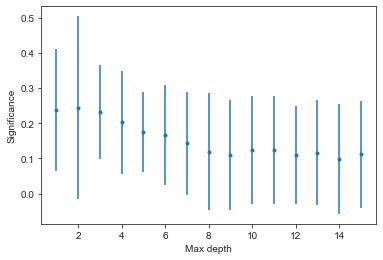

Best: 14


In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

ascores, astds = [], []
for _ in range(100):
    scores, stds = [], []
    
    for i in range(1,16):
        dt = DecisionTreeRegressor(max_depth = i)
        score = cross_val_score(dt, X, y, cv=5)#,scoring = "neg_mean_squared_error")
        scores.append(score)
#         stds.append(score.std())
    ascores.append(scores)
#     astds.append(stds)

asc = np.array(ascores)


scores = np.mean(asc,axis = (0,2))
stds = np.std(asc,axis = (0,2))

print(asc.shape)
print(scores.shape)
print(stds.shape)


plt.errorbar([i+1 for i in range(len(scores))],scores, yerr = stds, fmt='.')
plt.xlabel("Max depth")
plt.ylabel("Significance")

plt.show()
best = np.argmin(scores) + 1
print("Best:",best)

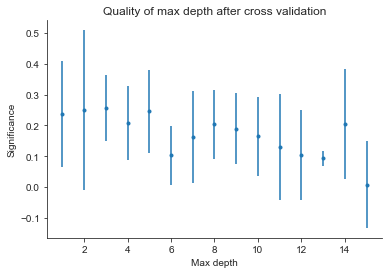

15
DecisionTreeRegressor(max_depth=15)


C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


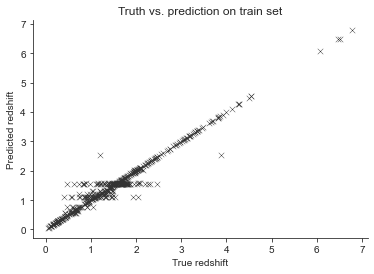

C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


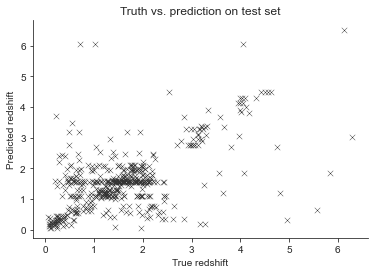

Train MSE is 0.04143442371349366
Test MSE is 0.8826681023559508


In [140]:
scores, stds = [], []

for i in range(1,16):
    dt = DecisionTreeRegressor(max_depth = i)
    score = cross_val_score(dt, X, y, cv=5)#,scoring = "neg_mean_squared_error")
    scores.append(score.mean())
    stds.append(score.std())


plt.errorbar([i+1 for i in range(len(scores))],scores, yerr = stds, fmt='.')
plt.xlabel("Max depth")
plt.ylabel("Significance")
sns.despine()
plt.title("Quality of max depth after cross validation")
plt.show()
best = np.argmin(scores) + 1
print(best)
dt = DecisionTreeRegressor(max_depth = best)
print(dt)
dt.fit(X,y)


pred = dt.predict(X)

sns.scatterplot(y,pred, s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Truth vs. prediction on train set")
sns.despine()
plt.show()
sns.scatterplot(y_test,dt.predict(X_test), s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Truth vs. prediction on test set")
sns.despine()
plt.show()
print("Train MSE is", MSE(y,pred))
print("Test MSE is", MSE(y_test,dt.predict(X_test)))

C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


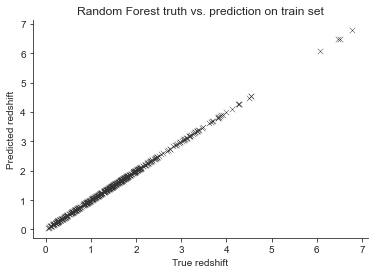

C:\Users\jakob\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


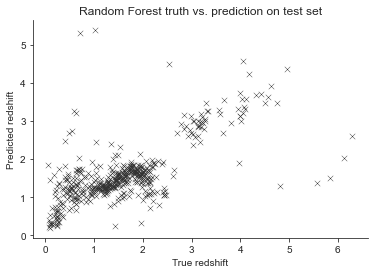

Train MSE is 1.5921541747774377e-28
Test MSE is 0.5965512275558067


In [142]:
from sklearn.ensemble import ExtraTreesRegressor

er = ExtraTreesRegressor(n_estimators = 500)

er.fit(X,y)

pred = er.predict(X)

sns.scatterplot(y,pred, s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Random Forest truth vs. prediction on train set")
sns.despine()
plt.show()
sns.scatterplot(y_test,er.predict(X_test), s= 30,color=".2",marker = 'x')
plt.xlabel("True redshift")
plt.ylabel("Predicted redshift")
plt.title("Random Forest truth vs. prediction on test set")
sns.despine()
plt.show()
print("Train MSE is", MSE(y,pred))
print("Test MSE is", MSE(y_test,er.predict(X_test)))

Ummidelbart ja, da random netop ikke optimerer overhovedet
